# Assembly_Trasition_Matrix

##알고리즘 구현에 필요한 함수선언

In [ ]:
def write(given_list,num,parts): #조합을 할 part만 새로 작성
  v=[]
  for x in range(parts):
    v.append(given_list[num][x])

  return v

def write_serial(parts):#초기 상태를 만들어 주는 함수
  serial=chr(65)

  for x in range(1,parts):
    serial=serial+'/'+chr(65+x)
  
  return serial

def to_zeros(result,serial): #시리얼 코드를 통하여 조합된 part들은 0으로 환 (물리적으로 하나임)
  for x in range(len(serial)): 
    result[ord(serial[x])-65]=0

def serial_checking(given_list,serial): #시리얼 코드를 통해 이미 조합된적 있는지 검사
  for x in range(len(given_list)):
    if(sorted(given_list[x][-1])==sorted(serial)):
      return 1

def node(tablelist,assembled,parts,now,start_to):#tablelist:조립 테이블 assembled:조립된 조각 테이블 
  templist=[]#현재 노드를 
  
  for y in range(0,len(assembled)):
    for x in range(0,len(tablelist)):
      v1=write(assembled,y,parts)#조립 되어있는 parts를 만든다
      v2=write(tablelist,x,parts)#조립 테이블을 불러온다

      if v1[x]>0:
        serial1=assembled[y][-1]#조립된 조각의 시리얼 저장
        serial2=tablelist[x][-1]#조립할 시리얼 저장

        result=list(np.array(v1)+np.array(v2))

        if(now!=0):#노드가 0 이 아닐경우에는 출발 시리얼과 도착 시리얼을 저장한다
          start_to.append([serial1,serial1+serial2])

        else:#만약에 노드 0일 경우엔 예외적으로 출발칸을 초기상태로 지정한다
          start_to.append([write_serial(parts),serial1+serial2])
          
        result.append(serial1)#출발 시리얼 저장
        result.append(serial1+serial2)#도착 시리얼 저장
        checking=serial_checking(templist,serial1+serial2)#이미 조립해본적 있는지 확인
        
        if(checking==1):#조립한적 있다면 업데이트를 하지 않는다
          pass

        else:
          to_zeros(result,serial1+serial2)
          templist.append(result)#조립한적 통해 나온값들 업데이트
  return templist

def make_arc(start_to,nametags):
  for x in range(len(start_to)):
    for y in range(len(nametags)):
      if sorted(start_to[x][0])==sorted(nametags[y]):#출발 리스트의 정렬값이 nametags의 어디에 위치해 있는지 확인
        start_to[x].append(y)#출발값 좌표저장

      if sorted(start_to[x][1])==sorted(nametags[y]):#도착 리스트의 정렬값이 nametags의 어디에 위치해 있는지 확인
        start_to[x].append(y)#도착값 좌표저장

def update_nametags(nametags,parts):
  for x in range(len(nametags)):
    serial=list(write_serial(parts))#/로 구분된 조각들을 list형태로 불러온다

    while('/' in sorted(serial)):#nametags에 저장된 값들은 /가 존재하지 않기때문에 '/'를 제거해준다
      serial.remove('/')

    for y in range(len(nametags[x])):
      if(sorted(nametags[x])[y] in sorted(serial)):
        serial.remove(sorted(nametags[x])[y])#조립된 parts들은 제거해준다.

    for z in range(len(serial)):
      nametags[x]=nametags[x]+'/'+serial[z]#새로운 조립 리스트를 완성한다.

## 입력부

In [ ]:
import numpy as np
import time
parts=int(input())
templist = []
times=[]
num=0
time_table=[]
for x in range(0,parts):
  print('parts:',chr(65+x))
  templist.append(input())
  
  print('----------------')

dataset= [[0 for col in range(parts+2)] for row in range(parts)]

for x in range(parts):
  for y in range(parts+2):
    if y<parts:
      dataset[x][y]=int(templist[x][y]) #조합 테이블 만들기

    elif(parts==y):
      dataset[x][y]=''
    else:
      dataset[x][y]=chr(65+x) #시리얼 코드 입력 A,B,C,....
print(dataset)

4
parts: A
0110
----------------
parts: B
1010
----------------
parts: C
1101
----------------
parts: D
0010
----------------
[[0, 1, 1, 0, '', 'A'], [1, 0, 1, 0, '', 'B'], [1, 1, 0, 1, '', 'C'], [0, 0, 1, 0, '', 'D']]


## Node연산

In [ ]:
time_table=[]
start_to=[]#조립되는 경우들을 기록한다
nametags=[]#조립된 모양을 기록한다.
now=0#Node번호

start=time.time()
print('Node:',now)
temp=node(dataset,dataset,parts,now,start_to)#level0 만들기
nametags.append(write_serial(parts))#초기상황인 A/B/C/....을 만든다

for x in range(0,len(temp)):
  nametags.append(temp[x][-1])#조립된 상황을 업데이트한다

print(temp)
print('-------------------------------------------------------------')

for x in range(0,parts-1):
  now=now+1
  print('Node:',now)

  temp=node(dataset,temp,parts,now,start_to)
  print(temp)
  print('-------------------------------------------------------------')

  for y in range(0,len(temp)):
    nametags.append(temp[y][-1])
time_table.append(time.time()-start)

Node: 0
[[0, 0, 2, 0, 'A', 'AB'], [0, 2, 0, 1, 'A', 'AC'], [2, 0, 0, 1, 'B', 'BC'], [1, 1, 0, 0, 'C', 'CD']]
-------------------------------------------------------------
Node: 1
[[0, 0, 0, 1, 'AB', 'ABC'], [0, 2, 0, 0, 'AC', 'ACD'], [2, 0, 0, 0, 'BC', 'BCD']]
-------------------------------------------------------------
Node: 2
[[0, 0, 0, 0, 'ABC', 'ABCD']]
-------------------------------------------------------------
Node: 3
[]
-------------------------------------------------------------


In [ ]:
start_to

[['A/B/C/D', 'AB'],
 ['A/B/C/D', 'AC'],
 ['A/B/C/D', 'BA'],
 ['A/B/C/D', 'BC'],
 ['A/B/C/D', 'CA'],
 ['A/B/C/D', 'CB'],
 ['A/B/C/D', 'CD'],
 ['A/B/C/D', 'DC'],
 ['AB', 'ABC'],
 ['AC', 'ACB'],
 ['AC', 'ACD'],
 ['BC', 'BCA'],
 ['BC', 'BCD'],
 ['CD', 'CDA'],
 ['CD', 'CDB'],
 ['ABC', 'ABCD'],
 ['ACD', 'ACDB'],
 ['BCD', 'BCDA']]

## Arc구현

In [ ]:
make_arc(start_to,nametags)#arc를 생성한다
time_table.append(time.time()-start-time_table[0])#arc를 생성하는데 걸리는 시간을 기록한다

update_nametags(nametags,parts)#/로 구분되게 nametags를 업데이트한다.
time_table.append(time.time()-start-time_table[1])#nametags를 업데이트 하는데 걸리는 시간을 기록한다.


## Matrix구현

In [ ]:
s=(len(nametags),len(nametags))
matrix=np.zeros(s)

for x in range(len(start_to)):
  for y in range(len(matrix)):
    matrix[start_to[x][-2]][start_to[x][-1]]=1#Matrix에 값을 저장

time_table.append(time.time()-start-time_table[2])

In [ ]:
import pandas as pd#판다스 라이브러리 import
df=pd.DataFrame(matrix,index=nametags,columns=nametags)#보기좋게 데이터프레임으로 변형
df

,A/B/C/D,AB/C/D,AC/B/D,BC/A/D,CD/A/B,ABC/D,ACD/B,BCD/A,ABCD
A/B/C/D,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
AB/C/D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AC/B/D,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
BC/A/D,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
CD/A/B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
ABC/D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ACD/B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
BCD/A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ABCD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
time_table.append(time.time()-start-time_table[3])
for x in range(len(time_table)):
  if x==0:
    print('node를 돌리는 시간:\t',round(time_table[x],4),'s')
  
  elif x==1:
    print('nametag와 비교를 하여 위치를 확인하는데 걸리는 시간:\t',round(time_table[x],4),'s')

  elif x==2:
    print('/로 구분된 조립여부를 저장하는 시간:\t',round(time_table[x],4),'s')
  
  elif x==3:
    print('Matrix를 만드는데 걸리는 시간:\t',round(time_table[x],4),'s')
  
  else:
    print('DataFrame으로 전환하는데 걸리는 시간:\t',round(time_table[x],4),'s')
print('총 수행시간:\t',round(time.time()-start,4),'s')

node를 돌리는 시간:	 0.013 s
nametag와 비교를 하여 위치를 확인하는데 걸리는 시간:	 2.0252 s
/로 구분된 조립여부를 저장하는 시간:	 0.0132 s
Matrix를 만드는데 걸리는 시간:	 3.9516 s
DataFrame으로 전환하는데 걸리는 시간:	 0.3724 s
총 수행시간:	 4.3262 s


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
avg_list

[0.0012449502944946289,
 0.0010140180587768556,
 0.0030460357666015625,
 0.008552861213684083,
 0.011699080467224121,
 0.0162752628326416]

Text(0, 0.5, 'times')

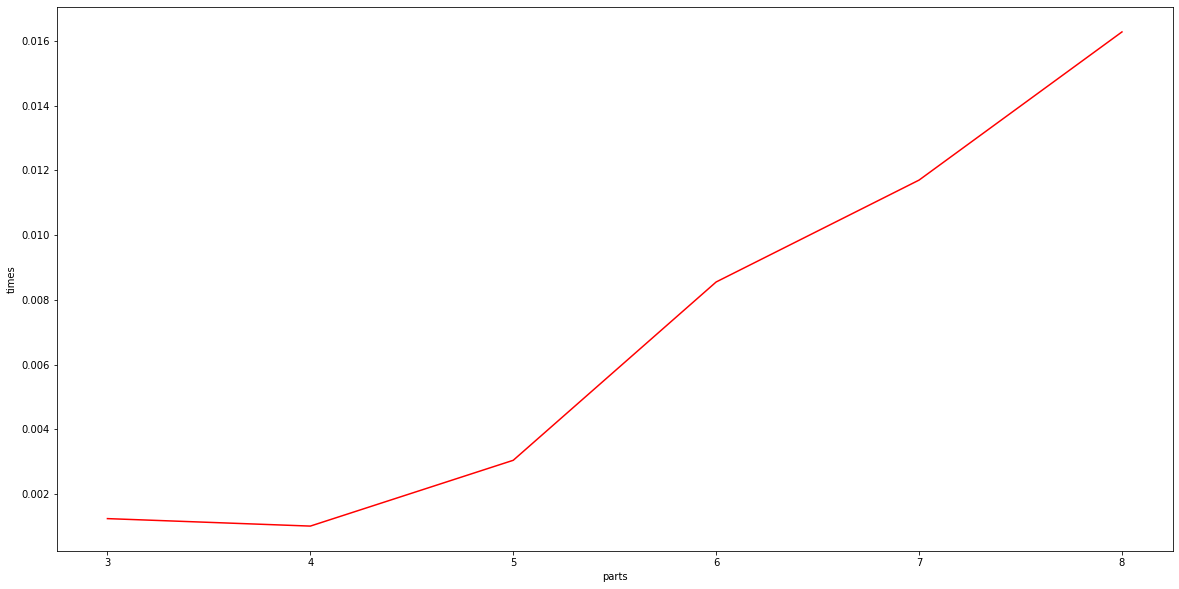

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(['3','4','5','6','7','8'],avg_list,c='red')
plt.xlabel('parts')
plt.ylabel('times')

In [ ]:
start_to

[['A/B/C/D', 'AB', 0, 1],
 ['A/B/C/D', 'AC', 0, 2],
 ['A/B/C/D', 'BA', 0, 1],
 ['A/B/C/D', 'BC', 0, 3],
 ['A/B/C/D', 'CA', 0, 2],
 ['A/B/C/D', 'CB', 0, 3],
 ['A/B/C/D', 'CD', 0, 4],
 ['A/B/C/D', 'DC', 0, 4],
 ['AB', 'ABC', 1, 5],
 ['AC', 'ACB', 2, 5],
 ['AC', 'ACD', 2, 6],
 ['BC', 'BCA', 3, 5],
 ['BC', 'BCD', 3, 7],
 ['CD', 'CDA', 4, 6],
 ['CD', 'CDB', 4, 7],
 ['ABC', 'ABCD', 5, 8],
 ['ACD', 'ACDB', 6, 8],
 ['BCD', 'BCDA', 7, 8]]